**22.11.4602**

IvanSusendra

In [ ]:
import pandas as pd


df = pd.read_csv("sample_data/netflix_titles.csv", delimiter=',')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:

# Display the first 5 rows of the DataFrame
print(df.head())

# Get the shape of the DataFrame
print("\nShape of the DataFrame:", df.shape)

# Get information about the DataFrame
print("\nInformation about the DataFrame:")
print(df.info())

# Describe the numerical features of the DataFrame
print("\nDescription of numerical features:")
print(df.describe())

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Get the data types of each column
print("\nData types of each column:")
print(df.dtypes)


# Example: Display unique values in a specific column (e.g., 'type')
print("\nUnique values in the 'type' column:")
print(df['type'].unique())

# Example: Value counts for a specific column (e.g., 'rating')
print("\nValue counts for the 'rating' column:")
print(df['rating'].value_counts())


  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [ ]:
#Data Preprocessing
# Handling Missing Values
# Fill missing values in 'director' and 'cast' with 'Unknown'
for col in ['director', 'cast']:
    df[col] = df[col].fillna('Unknown')

# Fill missing values in 'country' with the most frequent country
df['country'] = df['country'].fillna(df['country'].mode()[0])

# Fill missing values in 'date_added' with the most frequent value
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])

# Fill missing values in 'rating' with the most frequent rating
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

# Drop rows with missing values in 'duration'
df.dropna(subset=['duration'], inplace=True)


# Data Transformation
# Convert 'date_added' to datetime objects
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


# Feature Engineering (example)
# Create a new feature: 'duration_minutes'
df['duration_minutes'] = df['duration'].apply(lambda x: int(x.split()[0]) if 'min' in x else 0)

#Handling inconsistent data (Example: 'rating' column)
df['rating'] = df['rating'].replace({'74 min': 'NR', '84 min': 'NR', '66 min': 'NR'})

#Encoding categorical data (example: 'type' column)
df = pd.get_dummies(df, columns=['type'], prefix=['type'])


# Check for missing values after preprocessing
print("\nMissing values per column after preprocessing:")
print(df.isnull().sum())

# Display the first 5 rows of the preprocessed DataFrame
print("\nFirst 5 rows of the preprocessed DataFrame:")
print(df.head())


Missing values per column after preprocessing:
show_id              0
title                0
director             0
cast                 0
country              0
date_added          88
release_year         0
rating               0
duration             0
listed_in            0
description          0
duration_minutes     0
type_Movie           0
type_TV Show         0
dtype: int64

First 5 rows of the preprocessed DataFrame:
  show_id                  title         director  \
0      s1   Dick Johnson Is Dead  Kirsten Johnson   
1      s2          Blood & Water          Unknown   
2      s3              Ganglands  Julien Leclercq   
3      s4  Jailbirds New Orleans          Unknown   
4      s5           Kota Factory          Unknown   

                                                cast        country  \
0                                            Unknown  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel J

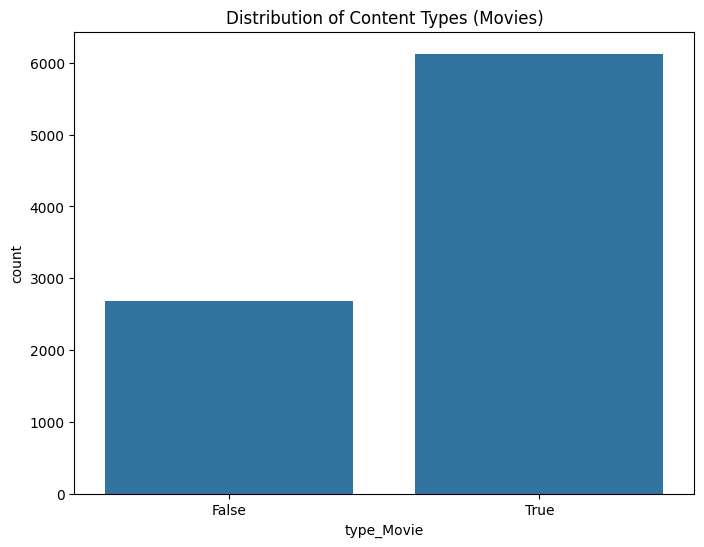

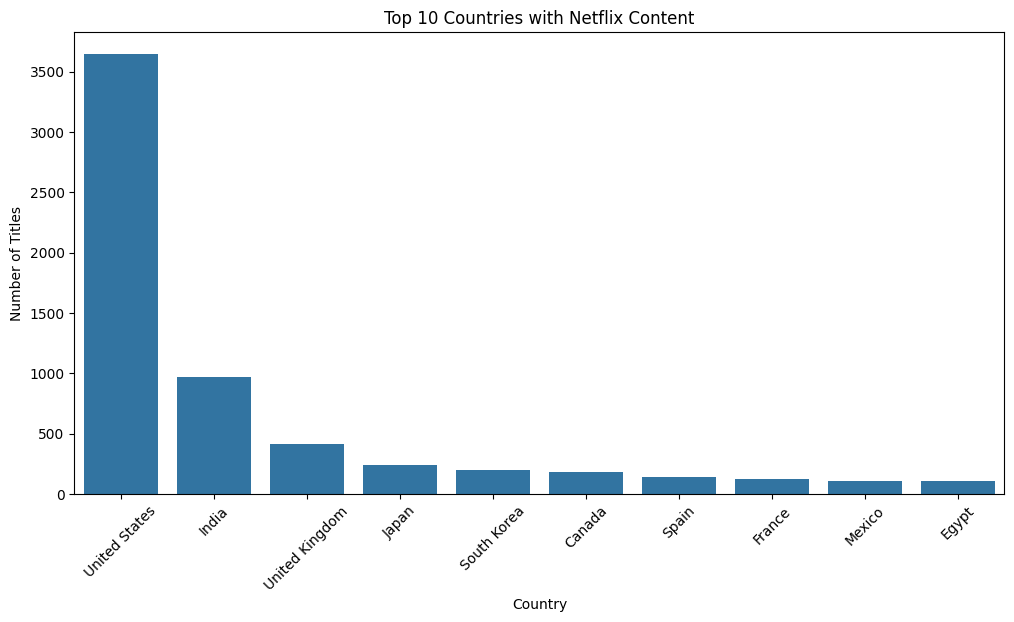

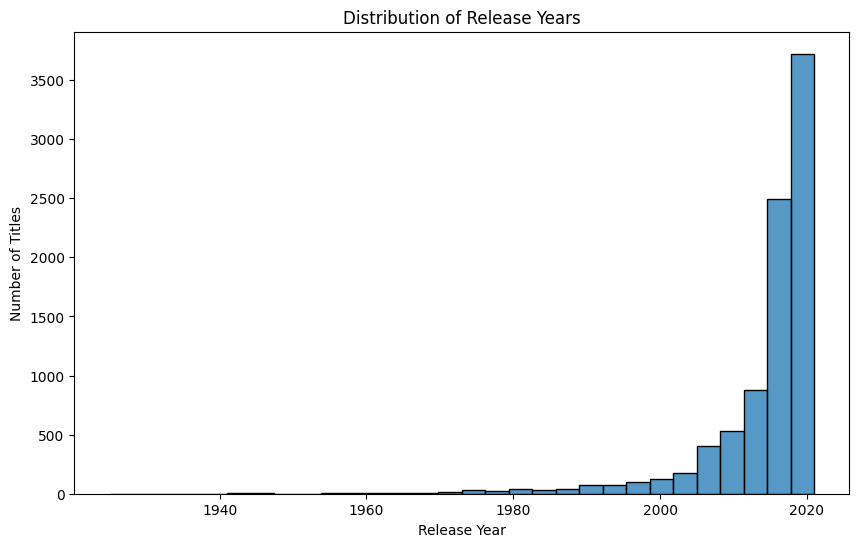

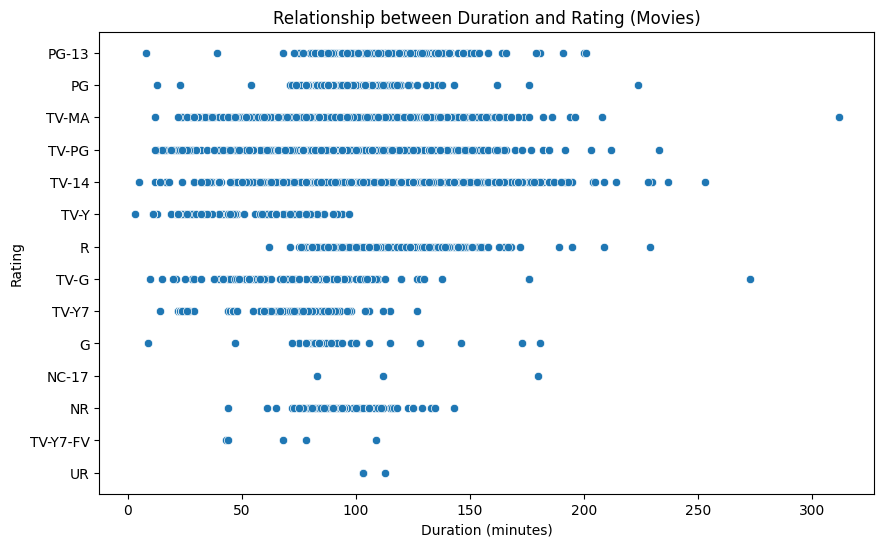

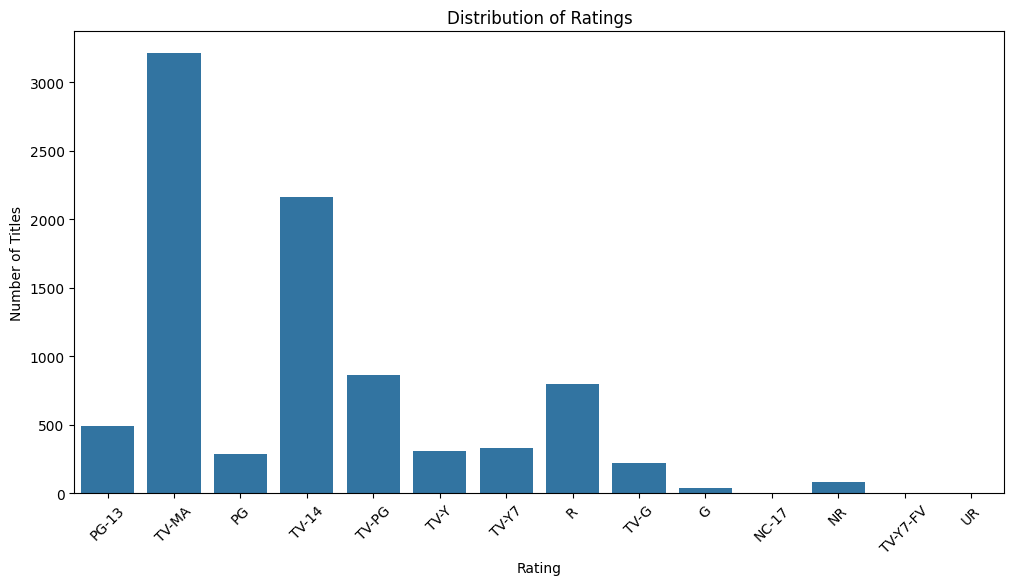

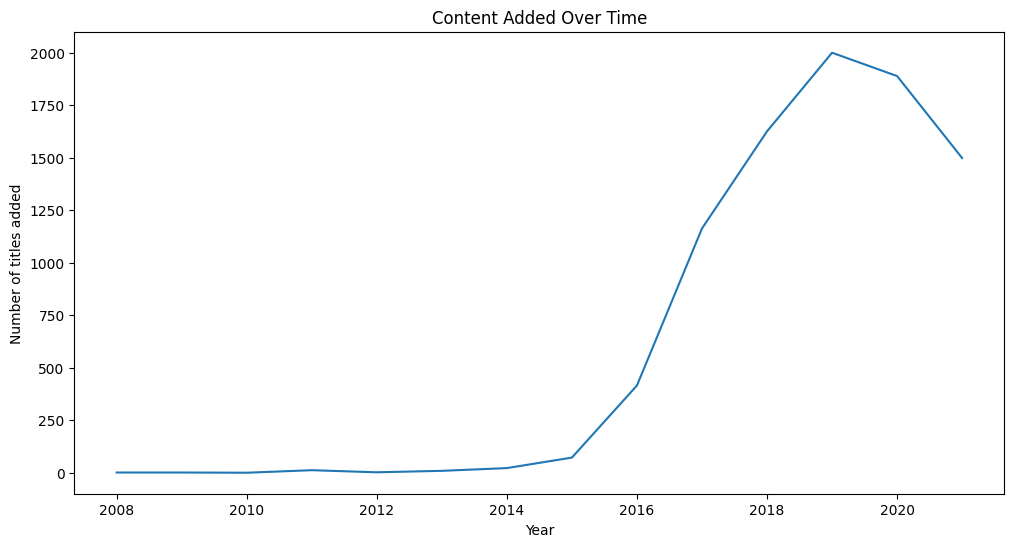

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Data Exploration and Visualization

# 1. Distribution of Content Types
plt.figure(figsize=(8, 6))
# Use the new one-hot encoded columns for content type
sns.countplot(x='type_Movie', data=df)  # Example: Count of Movies
plt.title('Distribution of Content Types (Movies)')
plt.show()

# 2. Top Countries with Netflix Content
top_countries = df['country'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Top 10 Countries with Netflix Content')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

# 3. Distribution of Release Years
plt.figure(figsize=(10, 6))
sns.histplot(df['release_year'], bins=30)
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.show()

# 4. Relationship between Duration and Rating (for movies)
movies_df = df[df['type_Movie'] == 1]  # Use the new one-hot encoded column
plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration_minutes', y='rating', data=movies_df)
plt.title('Relationship between Duration and Rating (Movies)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Rating')
plt.show()

# 5. Distribution of Ratings
plt.figure(figsize=(12, 6))
sns.countplot(x='rating', data=df)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

# 6. Content Added Over Time
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
plt.figure(figsize=(12,6))
df['date_added'].dt.year.value_counts().sort_index().plot()
plt.title('Content Added Over Time')
plt.xlabel('Year')
plt.ylabel('Number of titles added')
plt.show()



In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Define features (X) and target variable (y)
X = df.drop(['type_Movie', 'type_TV Show', 'show_id', 'title', 'director', 'cast', 'country', 'date_added', 'rating', 'duration', 'description'], axis=1)
y = df['type_Movie']

# Handle any remaining missing values (if any)
X.fillna(0, inplace=True)

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the 'listed_in' column in X
X['listed_in'] = label_encoder.fit_transform(X['listed_in']) # Apply Label Encoding to X

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 1. Univariate Feature Selection (Chi-squared test for categorical target)
bestfeatures = SelectKBest(score_func=chi2, k=5) # Select top 5 features
fit = bestfeatures.fit(X_train, y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)

# Concatenate dataframes
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']  # Name columns

print("Univariate Feature Selection (Chi-squared):")
print(featureScores.nlargest(5, 'Score')) #Print top 5 features

Univariate Feature Selection (Chi-squared):
              Specs          Score
2  duration_minutes  210524.362457
1         listed_in   40236.548869
0      release_year       8.829483


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:779: UserWarning: k=5 is greater than n_features=3. All the features will be returned.
  warnings.warn(


<Figure size 1200x800 with 0 Axes>

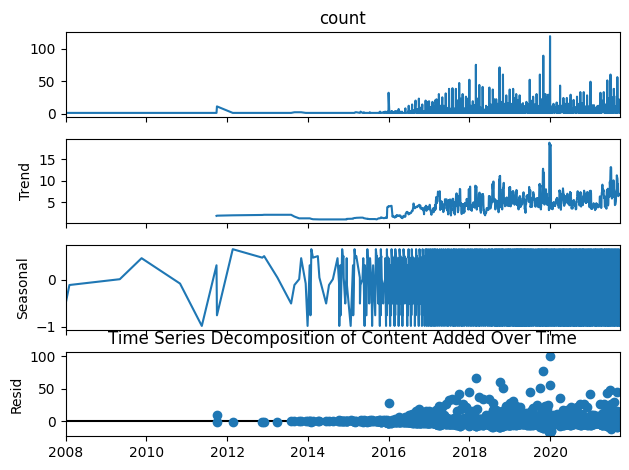

ADF Statistic: -8.403022
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Time series is stationary


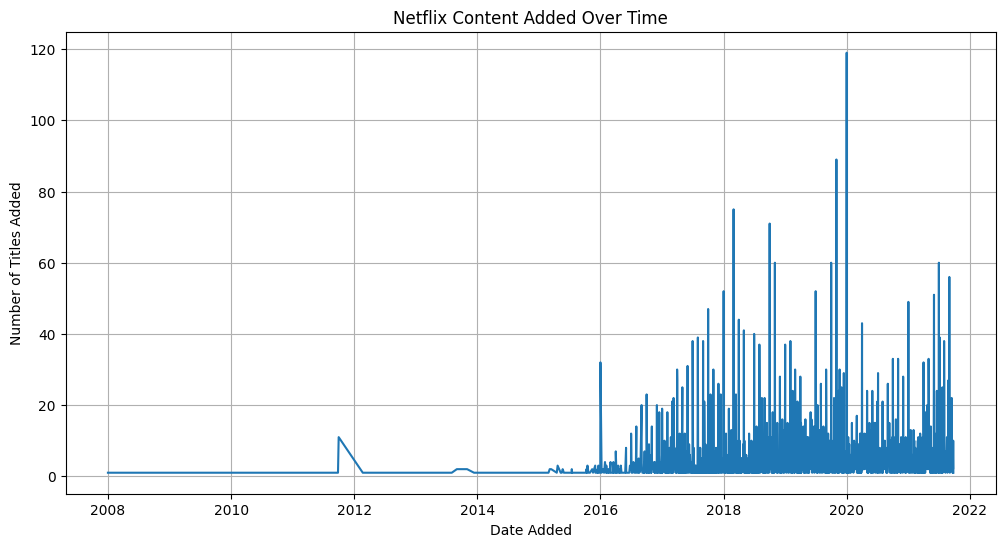

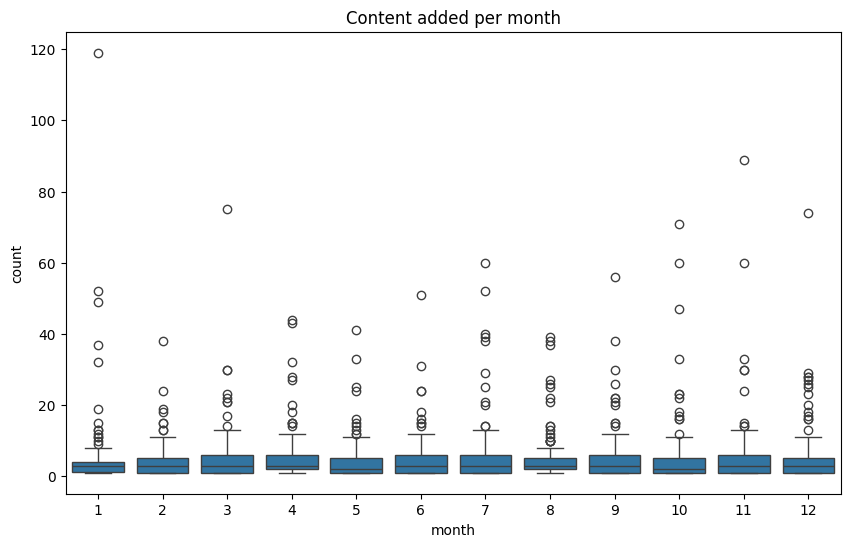

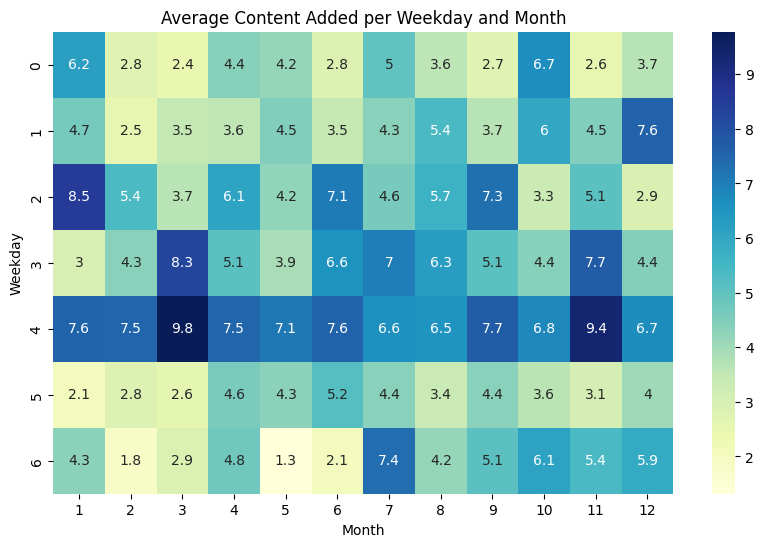

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

# Time Series Analysis and Visualization
df_date_added = df.groupby('date_added')['show_id'].count().reset_index()
df_date_added.rename(columns={'show_id': 'count'}, inplace=True)
df_date_added = df_date_added.set_index('date_added')


# 1. Time Series Decomposition
decomposition = seasonal_decompose(df_date_added['count'], model='additive', period=12)  # Adjust period as needed
fig = plt.figure(figsize=(12, 8))
fig = decomposition.plot()
plt.title('Time Series Decomposition of Content Added Over Time')
plt.show()


# 2. Augmented Dickey-Fuller Test (ADF Test) for Stationarity
result = adfuller(df_date_added['count'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[1] > 0.05:
    print("Time series is non-stationary")
else:
    print("Time series is stationary")

# 3. Plotting the time series data
plt.figure(figsize=(12, 6))
plt.plot(df_date_added.index, df_date_added['count'])
plt.title('Netflix Content Added Over Time')
plt.xlabel('Date Added')
plt.ylabel('Number of Titles Added')
plt.grid(True)
plt.show()



#Additional Visualizations (Examples)

# 4. Boxplot of content added per month
df_date_added['month'] = df_date_added.index.month
plt.figure(figsize=(10,6))
sns.boxplot(x='month', y='count', data=df_date_added)
plt.title('Content added per month')
plt.show()

# 5. Heatmap of content added per weekday and hour
df_date_added['weekday'] = df_date_added.index.dayofweek

# Pivot table for heatmap data
heatmap_data = df_date_added.pivot_table(values='count', index='weekday', columns='month', aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu")  # Use a suitable colormap
plt.title('Average Content Added per Weekday and Month')
plt.xlabel('Month')
plt.ylabel('Weekday')
plt.show()

In [ ]:

from sklearn.feature_selection import SelectKBest, chi2

# Data Preprocessing (combining and improving existing code)
for col in ['director', 'cast', 'country']:
    df[col] = df[col].fillna('Unknown')
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df['duration_minutes'] = df['duration'].str.extract('(\d+)').astype(float)  # Improved duration extraction
df.dropna(subset=['duration_minutes'], inplace=True) # Drop rows with still missing duration
df['rating'] = df['rating'].replace({'74 min': 'NR', '84 min': 'NR', '66 min': 'NR'})

# Feature Engineering: Extract year from date_added
df['added_year'] = df['date_added'].dt.year

# One-hot encoding for 'type' and 'rating'
df = pd.get_dummies(df, columns=['type', 'rating'], prefix=['type', 'rating'])

# Feature Selection
# Select relevant features and target variable
features = ['release_year', 'duration_minutes', 'added_year'] + [col for col in df.columns if 'type_' in col or 'rating_' in col]
X = df[features]
y = df['type_Movie'] #predicting movie or not

# Encode 'listed_in' - this step needs to happen AFTER feature selection to avoid errors
label_encoder = LabelEncoder()
df['listed_in'] = label_encoder.fit_transform(df['listed_in'])

# Feature Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)


# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = RandomForestClassifier(random_state=42)  # Improved model choice
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Feature Importance
feature_importances = pd.DataFrame({'Feature': features, 'Importance': model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print("\nFeature Importances:\n", feature_importances)

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00       566
        True       1.00      1.00      1.00      1195

    accuracy                           1.00      1761
   macro avg       1.00      1.00      1.00      1761
weighted avg       1.00      1.00      1.00      1761

Confusion Matrix:
 [[ 566    0]
 [   0 1195]]
Accuracy: 1.0

Feature Importances:
              Feature    Importance
4       type_TV Show  3.607009e-01
3         type_Movie  3.217893e-01
1   duration_minutes  2.890628e-01
0       release_year  7.471983e-03
10          rating_R  7.397661e-03
2         added_year  6.111639e-03
9       rating_PG-13  3.432439e-03
16      rating_TV-Y7  1.566527e-03
8          rating_PG  1.164729e-03
15       rating_TV-Y  7.339637e-04
13      rating_TV-MA  2.980919e-04
14      rating_TV-PG  1.176875e-04
5           rating_G  8.110099e-05
11      rating_TV-14  4.161000e-05
12       rating_TV-G  1.771045e-05
7     

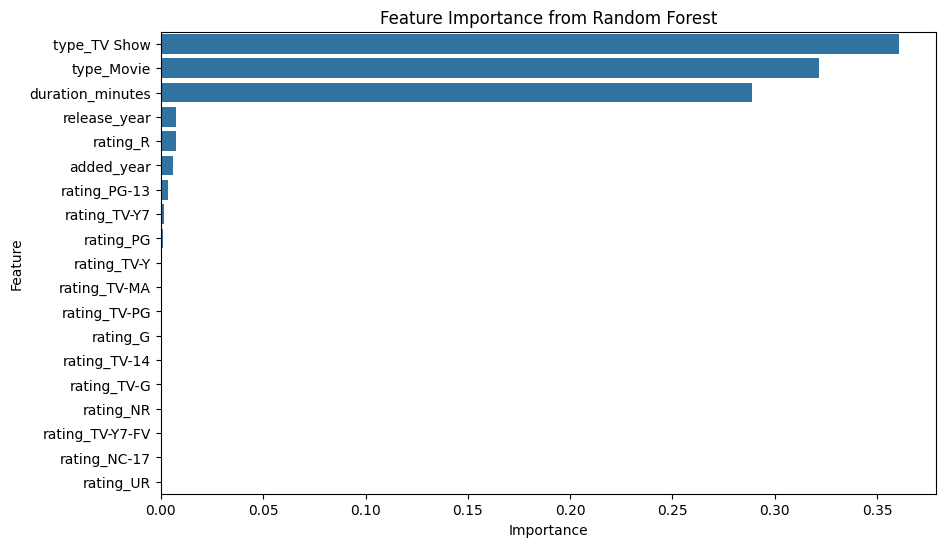

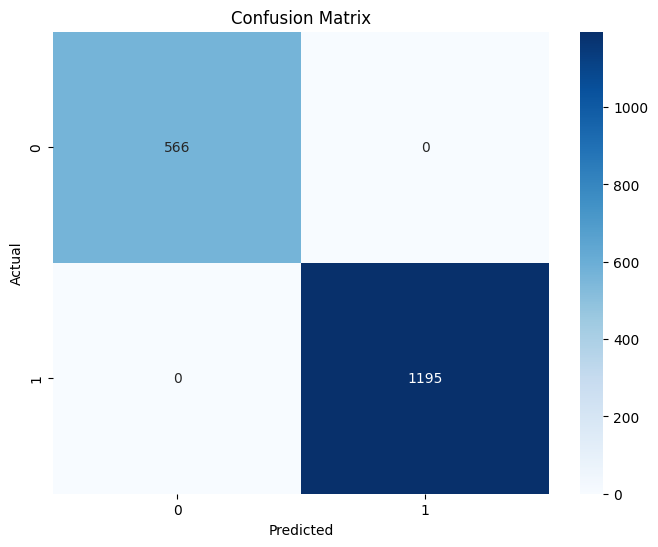

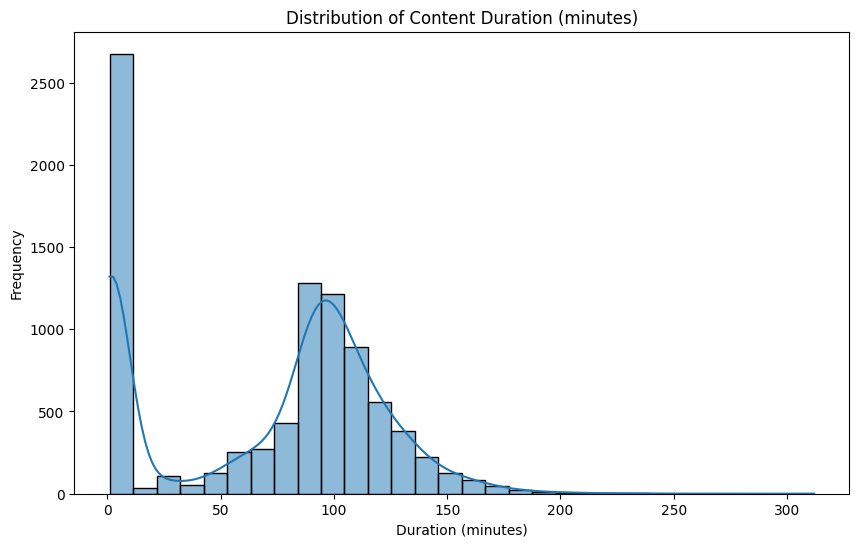

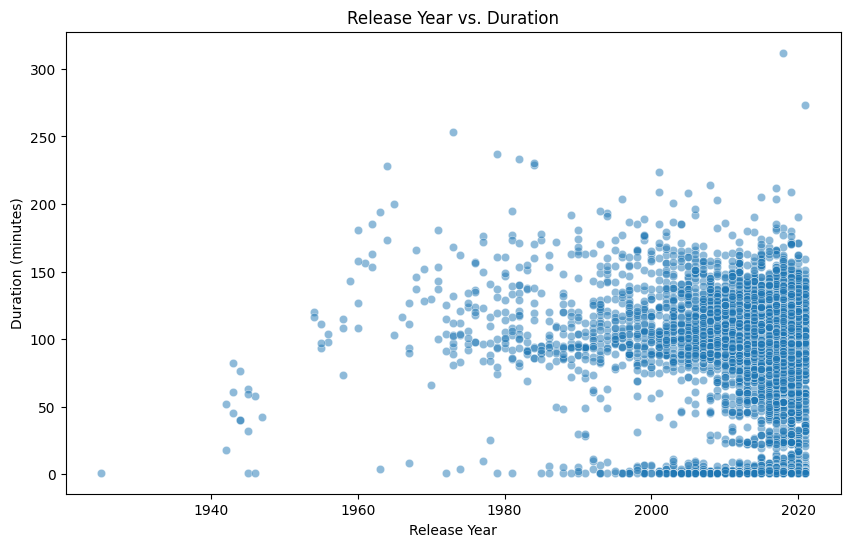

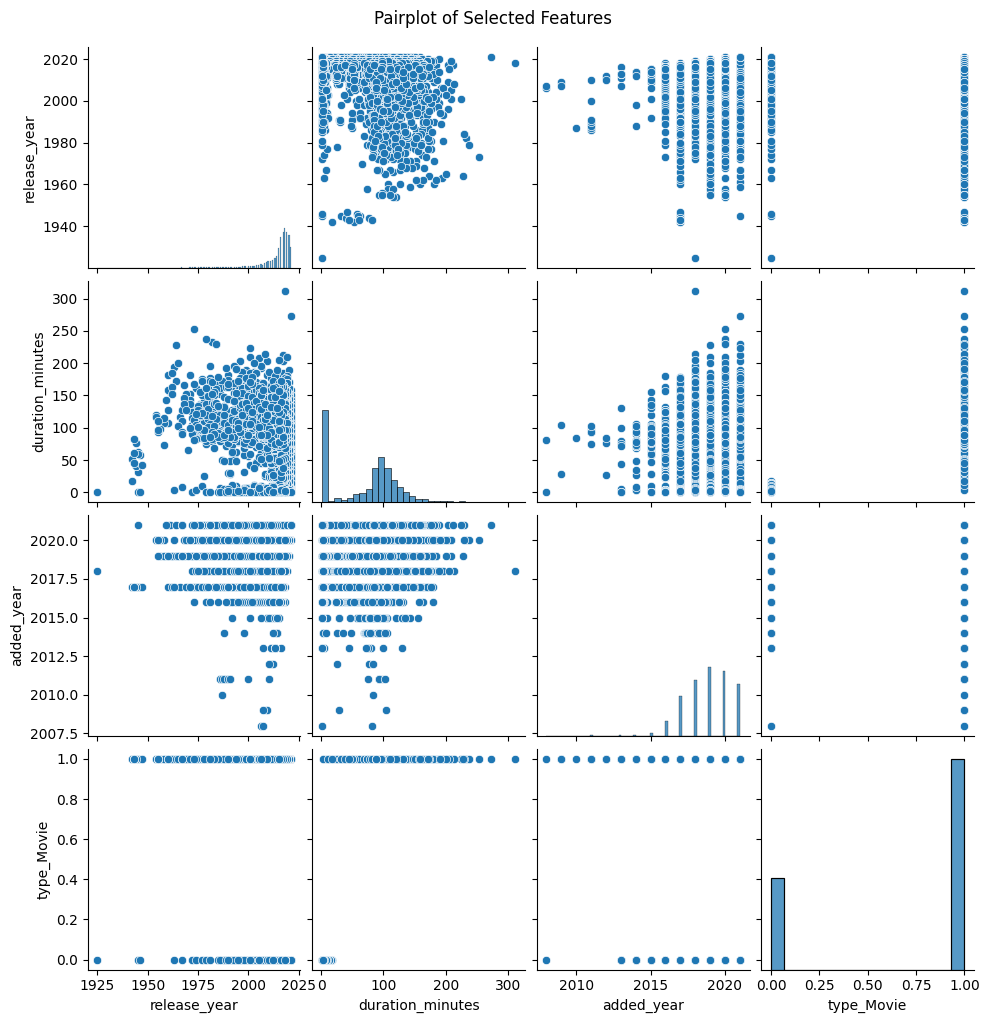

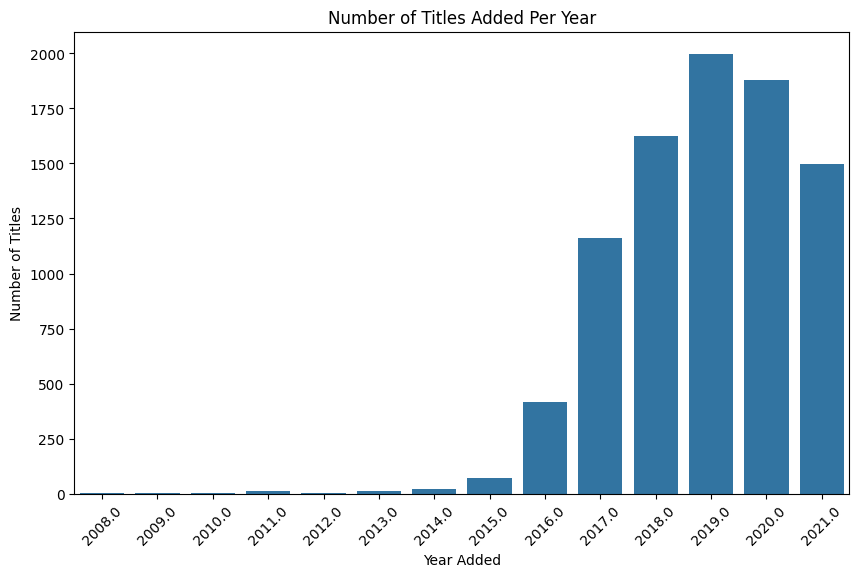

In [ ]:

# Visualizations based on Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance from Random Forest')
plt.show()

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Additional visualizations using the preprocessed data

# 1. Distribution of 'duration_minutes'
plt.figure(figsize=(10, 6))
sns.histplot(df['duration_minutes'], bins=30, kde=True)
plt.title('Distribution of Content Duration (minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

# 2. Relationship between 'release_year' and 'duration_minutes'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='release_year', y='duration_minutes', data=df, alpha=0.5)  # Added alpha for better visibility
plt.title('Release Year vs. Duration')
plt.xlabel('Release Year')
plt.ylabel('Duration (minutes)')
plt.show()


# 3. Pairplot of selected features (example)
selected_features = ['release_year', 'duration_minutes', 'added_year', 'type_Movie'] # Example features
sns.pairplot(df[selected_features])
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

# 4.  Content Added Over Time (using 'added_year')
plt.figure(figsize=(10, 6))
sns.countplot(x='added_year', data=df)
plt.title('Number of Titles Added Per Year')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()
